1. X: (22750, 33, 33, 1)  y: (22750, 1089)


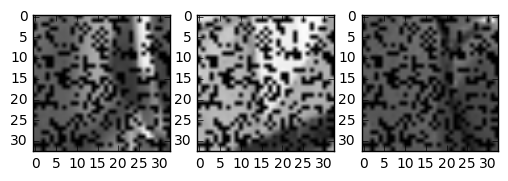

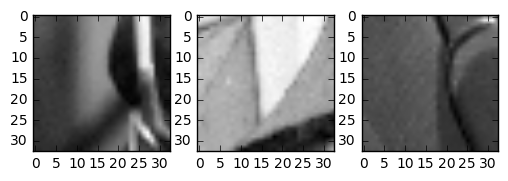

In [51]:
"""
1. Get X and y
2. Split into training and testing data
3. Reshape X -> (samples, channels, x-axis, y-axis)
   Reshape y -> (sampples, x-axis * y-axis)
4. Create ReconNet Units
   Figure out the zero padding post each step to maintain a 33 * 33 filter size 
"""
import joblib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def get_data_theanoformat(url_data_X, url_data_y):
    with open(url_data_X, 'rb') as handle:
        X = joblib.load(handle)
        
    with open(url_data_y, 'rb') as handle:
        y = joblib.load(handle)
    
    
    idxs = np.random.randint(0, len(X), 3)
    
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(X[idxs[0]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[1].imshow(X[idxs[1]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[2].imshow(X[idxs[2]].reshape((33,33)), cmap = plt.cm.gray)
    
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(y[idxs[0]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[1].imshow(y[idxs[1]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[2].imshow(y[idxs[2]].reshape((33,33)), cmap = plt.cm.gray)
    
    X = X.reshape((X.shape[0], 1, 33, 33))
    print ('1. X:', X.shape, ' y:', y.shape)
    return X , y

def get_data_tfformat(url_data_X, url_data_y):
    with open(url_data_X, 'rb') as handle:
        X = joblib.load(handle)
        X = X.reshape((X.shape[0], 33, 33, 1))
        
    with open(url_data_y, 'rb') as handle:
        y = joblib.load(handle)
    
    
    idxs = np.random.randint(0, len(X), 3)
    
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(X[idxs[0]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[1].imshow(X[idxs[1]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[2].imshow(X[idxs[2]].reshape((33,33)), cmap = plt.cm.gray)
    
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(y[idxs[0]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[1].imshow(y[idxs[1]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[2].imshow(y[idxs[2]].reshape((33,33)), cmap = plt.cm.gray)
    
    print ('1. X:', X.shape, ' y:', y.shape)
    return X , y

if __name__ == "__main__" :
    url_data_X = 'data/data_patches_X.gz'
    url_data_y = 'data/data_patches_y.gz'
    X_train, y_train = get_data_tfformat(url_data_X, url_data_y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

model = Sequential()

model.add(Convolution2D(32, kernel_size=(11, 11), activation='relu'
                            #, input_shape=(1,32,32), data_format='channels_first', padding='same')
                            , input_shape=(33,33,1), data_format='channels_last', padding='same')
                        )
# print ('First layer:', model.output_shape)
# print ('First layer:', model.layers[0].output_shape)

model.add(Convolution2D(64, kernel_size=(1, 1), activation='relu', padding='same'))

model.add(Convolution2D(1, kernel_size=(7, 7), activation='relu', padding='same'))

model.add(Convolution2D(32, kernel_size=(11, 11), activation='relu', padding='same'))

model.add(Convolution2D(64, kernel_size=(1, 1), activation='relu', padding='same'))

model.add(Convolution2D(1, kernel_size=(7, 7), activation='relu', padding='same'))

model.add(Flatten())

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

model.summary()
model.fit(X_train, y_train, batch_size=32, epochs = 10, verbose=1, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 33, 33, 32)        3904      
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 33, 33, 64)        2112      
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 33, 33, 1)         3137      
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 33, 33, 32)        3904      
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 33, 33, 64)        2112      
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 33, 33, 1)         3137      
_________________________________________________________________
flatten_15 (Flatten)         (None, 1089)              0         
Total para